# Analyzing the Impact of the Sierra Nevada Mountains on Precipitation

# By: Garrick Hague


## Objective:

### 1) Familiarize with the topography of the Lake Tahoe region.

### 2)  Examines precipitation differences between three locations.

### 3) Compare correlation of yearly max precipitation.

### 4) Apply Extreme Value Theory to estimate the likelihood of maximum precipitation per region.

## Motivation:

### Growing up in Carson City, Nevada, I frequently traveled to Lake Tahoe to swim and enjoy the picturesque lake. During winters, I would spend my time snowboarding and playing in the snow. My fascination with weather and its driving forces led me to ponder the inconsistencies in the amount of snowfall the lake received each year, and why some years the resorts had to rely on man-made snow. Additionally, I couldn't help but notice the striking contrast in vegetation between the areas around Sacramento, California, and those around Lake Tahoe. This curiosity led me to pursue a degree in Atmospheric Science, which helped me to understand the differences between the Sacramento Valley, Lake Tahoe, and the eastern side of the Sierra Mountains. In this study, I will examine the variations between these regions, focusing on a one-degree difference in longitude while maintaining the same latitude. Join me on this journey, and perhaps you too will come to love this place as much as I do.

![meru](meru.png)

## Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import pyextremes
import statsmodels.api as sm
import scipy.stats as stats
import time


import warnings
warnings.filterwarnings('ignore')

## Reading in the Data

In [2]:
# Loading Precip Data


data_1 = xr.open_dataset("iprcp_cpc_daily_us_239E_39N_n_max.nc")
data_2 = xr.open_dataset("iprcp_cpc_daily_us_240E_39N_n_max.nc")
data_3 = xr.open_dataset("iprcp_cpc_daily_us_241E_39N_n_max.nc")

# Loading Temp Data

temp_1 = xr.open_dataset("iberkeley_tmax_daily_239E_39N_n_max.nc")
temp_2 = xr.open_dataset("iberkeley_tmax_daily_240E_39N_n_max.nc")
temp_3 = xr.open_dataset("iberkeley_tmax_daily_241E_39N_n_max.nc")

# Dropping Nan Values

data_1 = data_1.dropna(dim='time', how='any')
data_2 = data_2.dropna(dim='time', how='any')
data_3 = data_3.dropna(dim='time', how='any')

# Dropping Nan Values

temp_1 = temp_1.dropna(dim='time', how='any')
temp_2 = temp_2.dropna(dim='time', how='any')
temp_3 = temp_3.dropna(dim='time', how='any')

## Part 1: 

## Getting familiar with the data

In [3]:
data_1

<xarray.Dataset>
Dimensions:  (time: 27503)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-01-02 ... 2023-04-20
Data variables:
    prcp     (time) float32 0.679 13.0 3.401 3.051 2.441 ... 0.0 2.413 0.0 0.0
Attributes: (12/22)
    title:                      spatial statistic of CPC unified (gauge-based...
    description:                CPC daily precipitation 239E 39N
    minimal_valid_fraction:      30.00
    file:                       NCEPData/prcp_CONUS_daily.nc
    cdi:                        Climate Data Interface version 2.0.5 (https:/...
    cdo:                        Climate Data Operators version 2.0.5 (https:/...
    ...                         ...
    scripturl01:                http://climexp.knmi.nl/get_index.cgi?email=so...
    max_region:                 lon= -121.250 -121.000, lat=   38.750   39.000
    comment:                    
    scripturl02:                http://climexp.knmi.nl/dat2nc.cgi?id=someone@...
    history:                     2023-04-22 15:20:29 ./bin/dat2nc data/iprcp_...
    Conventions:                CF-1.0

In [4]:
# Looking at all 3 Lat and Lon

print(f"Dataset 1: {data_1.attrs['max_region']}")
print(f"Dataset 2: {data_2.attrs['max_region']}")
print(f"Dataset 3: {data_3.attrs['max_region']}")

Dataset 1: lon= -121.250 -121.000, lat=   38.750   39.000
Dataset 2: lon= -120.250 -120.000, lat=   38.750   39.000
Dataset 3: lon= -119.250 -119.000, lat=   38.750   39.000


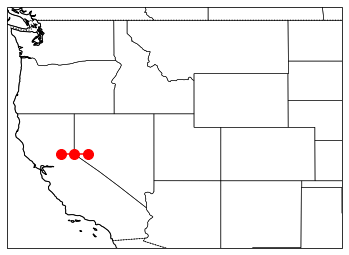

In [5]:
# Plotting Locations


# Create a new figure with a PlateCarree projection
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent to the west coast and Colorado region of the US
ax.set_extent([-125, -100, 32, 50], crs=ccrs.PlateCarree())

# Add map features
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5)

# Add points to the map
lon = [-121, -120, -119]  # Longitude coordinates of the points
lat = [39, 39, 39]  # Latitude coordinates of the points
ax.plot(lon, lat, marker='o', markersize=10, color='red', transform=ccrs.PlateCarree())


plt.show()

![elevation](elevation.PNG)

### The figures displayed above depict the three locations that were analyzed in this study. Despite being located on the same latitude, the three locations are separated by only one degree of longitude. The plots also include the elevation profile between the three points, highlighting the changes in elevation between each location. This information is relevant to the analysis as it can affect precipitation levels due to the orographic effect, with mountains having a significant impact on weather patterns. By accounting for differences in elevation and other topographic features, this analysis provides a more comprehensive understanding of the precipitation patterns observed at each location.

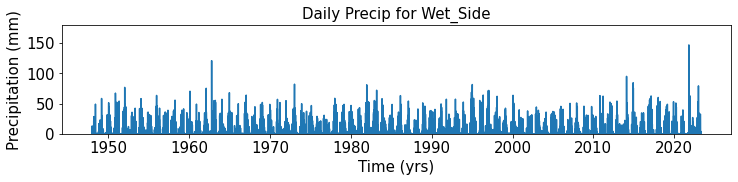

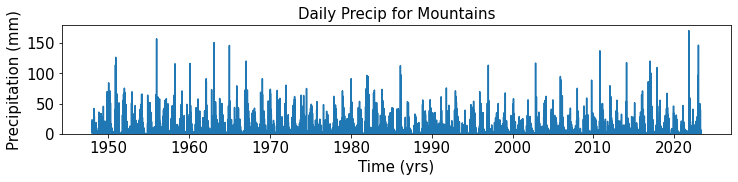

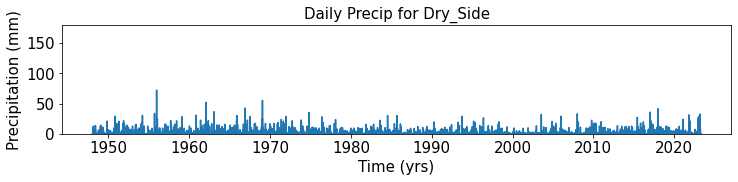

In [6]:
# Plotting Daily Precip over time


# Generating data and name lists to utilize the zip function for iteration
data = [data_1, data_2, data_3]
coords = ['Wet_Side', 'Mountains', 'Dry_Side']

for x,y in zip(data, coords): 
    fig,ax= plt.subplots(figsize=(12,2))
    
    # Plotting data
    plt.plot(x.time, x['prcp'])

    # Add map features
    plt.title(f"Daily Precip for {y}", fontsize=15)
    plt.xlabel('Time (yrs)', fontsize=15)
    plt.ylabel('Precipitation (mm)', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_ylim([0, 180])

    plt.show()

### The visualizations provided above highlight the substantial difference in precipitation amounts between the regions on either side of the mountains. While the wet side of the mountains receives higher precipitation levels, the dry side of the mountains experiences much lower precipitation amounts. This variation can be attributed to the orographic effect, wherein the mountains act as a barrier to the moisture-laden air masses that travel from the west. As the air rises and cools on the windward side of the mountains, it releases moisture in the form of rain or snow. In contrast, the leeward side of the mountains receives relatively little precipitation as the air masses have already lost much of their moisture content while passing over the mountains. Overall, the significant contrast in precipitation levels between the two regions underscores the influence of topography on weather patterns.

In [22]:
# Calculating the total precipitation to compare the difference in precipitation between each side.


# Creating empty list
max_total = []

for x,y in zip(data, coords):
    total = float(x['prcp'].sum().item())
    
    # converting to feet
    length_feet = total / 304.8 
    print(f"The total precip for {y}: {round(float(length_feet), 2)} ft")
    
    # appending data to max_total list 
    max_total.append(int(length_feet))
    

print('\n', f'Mountains are {round((271.16 / 187.92), 2)} times more precip than wet side')
print(f'Mountains are {round((271.16 / 40.11), 2)} times more precip than dry side')
print(f'Wet side are {round((187.92 / 40.11), 2)} times more precip than dry side')

The total precip for Wet_Side: 187.92 ft
The total precip for Mountains: 271.16 ft
The total precip for Dry_Side: 40.11 ft

 Mountains are 1.44 times more precip than wet side
Mountains are 6.76 times more precip than dry side
Wet side are 4.69 times more precip than dry side


In [8]:
# Retrieving the date and corresponding maximum precipitation of an event


# Creating empty list
precip_max_list = []

for x,y in zip(data, coords):
    # Find max precipitation value and time
    max_precip = x['prcp'].max(dim='time')
    time_of_max_precip = x['time'][x['prcp'].argmax(dim='time')]
    
    # appending values to empty list
    precip_max_list.append(round(float(max_precip), 2))
    
    # Print results
    print('\n', f'Maximum precipitation for {y}:', float(max_precip), '(mm)')
    print(f'Time of maximum precipitation for {y}:', pd.to_datetime(time_of_max_precip.values))
    
print('\n', f'Precip on dry side during 2021-10-25:', data_3.sel(time='2021-10-25 00:00:00')['prcp'].values, '(mm)')


 Maximum precipitation for Wet_Side: 147.131103515625 (mm)
Time of maximum precipitation for Wet_Side: 2021-10-25 00:00:00

 Maximum precipitation for Mountains: 170.68040466308594 (mm)
Time of maximum precipitation for Mountains: 2021-10-25 00:00:00

 Maximum precipitation for Dry_Side: 72.34258270263672 (mm)
Time of maximum precipitation for Dry_Side: 1955-12-23 00:00:00

 Precip on dry side during 2021-10-25: 31.30679 (mm)


### It is interesting to note that while two locations experienced their maximum daily precipitation on the same day, the location on the dry side of the mountains had a different day of maximum precipitation. This observation suggests that proximity to the locations is not always the sole factor in determining the timing of extreme precipitation events. Mountains are known to have a significant impact on storms, and this effect may be a contributing factor to the observed differences in precipitation timing.

![river](satelliteLowView.gif)
#### Credit: NOAA

### The video presented above depicts the impact of a bomb cyclone that caused rain bands to slam into Northern California on October 25th, 2021. As a result, two regions analyzed in this notebook recorded their largest one-day precipitation totals to date.

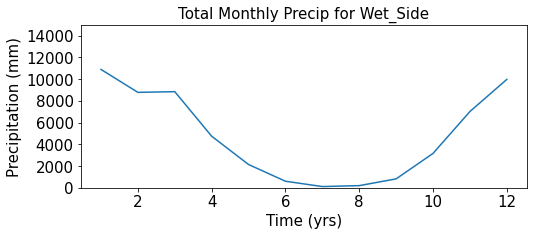

The month with the highest precipitation is: [1] for Wet_Side


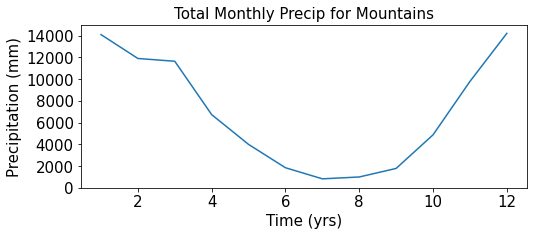

The month with the highest precipitation is: [12] for Mountains


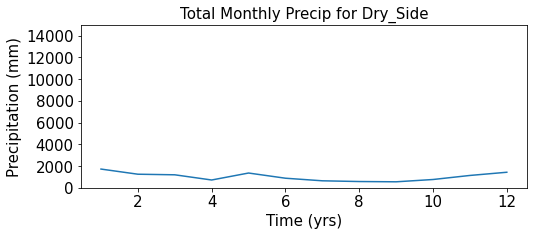

The month with the highest precipitation is: [1] for Dry_Side


In [26]:
# Aggregating precipitation data by month to determine which months have the highest precipitation levels. 


for x,y in zip(data, coords): 
    # Group the data by month and sum the precipitation for each month
    monthly_precip = x.groupby('time.month').sum(dim='time')

    # Find the months with the highest precipitation
    max_precip_months = monthly_precip.where(monthly_precip == monthly_precip.max(), 
                                             drop=True).month.values.tolist()
    
    #plotting monthly precip
    fig,ax= plt.subplots(figsize=(8,3))

    plt.plot(monthly_precip.month, monthly_precip['prcp'])

    plt.title(f"Total Monthly Precip for {y}", fontsize=15)
    plt.xlabel('Time (yrs)', fontsize=15)
    plt.ylabel('Precipitation (mm)', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_ylim([0, 15000])

    plt.show()
    
    # Print the resulting months
    print(f"The month with the highest precipitation is: {max_precip_months} for {y}")

### Grouping the data by month and aggregating it reveals that the majority of precipitation occurs during the winter months, with minimal precipitation falling in the summer. The figures presented above reinforce this observation, as they show that the y-axis limits are consistent across all plots, indicating the low precipitation levels on the dry side of the mountains. This finding is particularly noteworthy as it demonstrates that even a small difference of one degree of longitude (41.68 miles) can significantly impact precipitation patterns. Overall, this analysis underscores the role of topography and other environmental factors in influencing precipitation patterns.

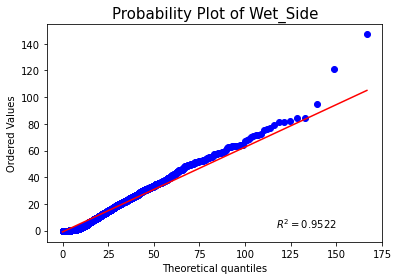

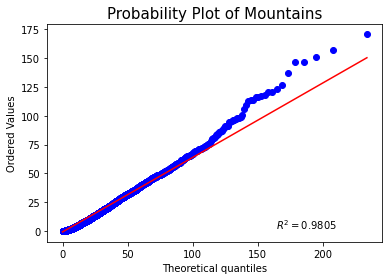

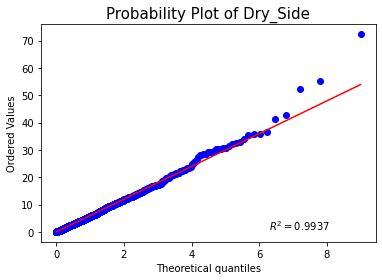

In [27]:
# Looking at Q-Q Plots


# converting data into numpy array
num_data_1 = data_1['prcp'].to_numpy()
num_data_2 = data_2['prcp'].to_numpy()
num_data_3 = data_3['prcp'].to_numpy()

# creating a list with the numpy array's in it to iterate through
num_list = [num_data_1, num_data_2, num_data_3]

for x,y in zip(num_list, coords):
    # Fit a gamma distribution to the data
    fit_alpha, fit_loc, fit_beta = stats.gamma.fit(x)

    # Generate random samples from the gamma distribution
    gamma_samples = stats.gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=len(x))

    # Create a new figure and axes object 
    fig,ax= plt.subplots(figsize=(6,4))

    # Generate a QQ plot
    stats.probplot(x, dist=stats.gamma, sparams=(fit_alpha, fit_loc, fit_beta), plot=plt, rvalue=True)
    
    
    plt.title(f"Probability Plot of {y}", fontsize=15)

    plt.show()

### The R-squared values for all the QQ plots above indicate a good fit between the data and the gamma distribution. This suggests that the gamma distribution is an appropriate choice for modeling the precipitation data.

In [11]:
# Next, we'll examine the maximum precipitation per year for the mountainous region 
# and compare those dates with the maximum precipitation days on the wet and dry sides.


# converting data into pandas dataframe
panda_data_1 = data_1['prcp'].to_pandas()
panda_data_2 = data_2['prcp'].to_pandas()
panda_data_3 = data_3['prcp'].to_pandas()

temp_panda_1 = temp_1['TMAX'].to_pandas()
temp_panda_2 = temp_2['TMAX'].to_pandas()
temp_panda_3 = temp_3['TMAX'].to_pandas()

# merge dataframes on 'key' column
merged_df = pd.concat([panda_data_1, panda_data_2, panda_data_3], axis=1)
merged_df.columns = coords

temp_df = pd.concat([temp_panda_1, temp_panda_2, temp_panda_3], axis=1)
temp_df.columns = coords

# Converting index to datetime object
merged_df.index = pd.to_datetime(merged_df.index)
temp_df.index = pd.to_datetime(temp_df.index)

# Mountains:

# Group by year and get the index of maximum precipitation for each year
max_mt_precip_index = merged_df.groupby(pd.Grouper(freq='Y'))['Mountains'].idxmax()

# Extract the rows with maximum precipitation for each year
max_mt_precip_per_year = merged_df.loc[max_mt_precip_index]

# Dry side:

# Group by year and get the index of maximum precipitation for each year
max_ds_precip_index = merged_df.groupby(pd.Grouper(freq='Y'))['Dry_Side'].idxmax()

# Extract the rows with maximum precipitation for each year
max_ds_precip_per_year = merged_df.loc[max_ds_precip_index]

# Wet side:

# Group by year and get the index of maximum precipitation for each year
max_ws_precip_index = merged_df.groupby(pd.Grouper(freq='Y'))['Wet_Side'].idxmax()

# Extract the rows with maximum precipitation for each year
max_ws_precip_per_year = merged_df.loc[max_ws_precip_index]

# get the dates from the index of the first dataframe
dates_to_filter = max_mt_precip_per_year.index

# filter the temp data compared to mountain max
filtered_temp_df = temp_df[temp_df.index.isin(dates_to_filter)]

print('\n', f'Wet side: ', '\n', max_ws_precip_per_year)
print(f'Mountains:', '\n', max_mt_precip_per_year)
print('\n', f'Dry side: ', '\n', max_ds_precip_per_year)


 Wet side:  
               Wet_Side   Mountains   Dry_Side
time                                         
1948-05-30   49.057041   12.486160  13.781010
1949-03-03   58.468182   28.890720   0.058729
1950-11-18   67.331177  113.934097  14.385080
1951-05-04   54.133961   18.436081   0.296445
1952-01-12   76.876282   68.796127   9.688618
...                ...         ...        ...
2019-12-02   53.064720   45.935169   3.194360
2020-03-16   50.996059   24.006001   0.610881
2021-10-25  147.131104  170.680405  31.306789
2022-12-31   52.776939  146.697998  17.888800
2023-01-01   79.309662   83.648064  20.558359

[76 rows x 3 columns]
Mountains: 
               Wet_Side   Mountains   Dry_Side
time                                         
1948-03-24   28.496361   41.749352   1.127486
1949-11-10   31.413349   69.752274  20.832359
1950-12-03   52.218430  126.608597   6.888327
1951-12-28   44.135441   75.513237  14.727580
1952-12-07   35.611839   69.524940   2.330852
...                ...       

In [12]:
# Displaying shared dates

print("Number of rows in dataframe:", len(max_mt_precip_per_year))


# Join the two dataframes on the datetime index
merg_df = max_mt_precip_per_year.merge(max_ds_precip_per_year, left_index=True, right_index=True)

# Count the number of rows with the same date
date_counts = merg_df.groupby(merg_df.index).size()

print(f'Mountains Vs. Dry side', '\n', date_counts, '\n')

# Join the two dataframes on the datetime index
merg_df = max_mt_precip_per_year.merge(max_ws_precip_per_year, left_index=True, right_index=True)

# Count the number of rows with the same date
date_counts = merg_df.groupby(merg_df.index).size()

print(f'Mountains Vs. Wet side', '\n', date_counts, '\n')

# Join the two dataframes on the datetime index
merg_df = max_ws_precip_per_year.merge(max_ds_precip_per_year, left_index=True, right_index=True)

# Count the number of rows with the same date
date_counts = merg_df.groupby(merg_df.index).size()

print(f'Dry side Vs. Wet side', '\n', date_counts)

Number of rows in dataframe: 76
Mountains Vs. Dry side 
 time
1949-11-10    1
1955-12-23    1
1959-02-16    1
1962-02-09    1
1966-12-06    1
1973-11-12    1
2001-12-02    1
2008-01-05    1
2009-10-14    1
2021-10-25    1
dtype: int64 

Mountains Vs. Wet side 
 time
1953-04-27    1
1958-04-03    1
1960-02-08    1
1964-12-23    1
1968-11-03    1
1971-12-25    1
1974-07-09    1
1981-12-20    1
1982-01-05    1
1985-02-08    1
1988-11-23    1
1991-10-26    1
1992-12-09    1
2009-10-14    1
2010-10-25    1
2014-02-09    1
2021-10-25    1
2022-12-31    1
2023-01-01    1
dtype: int64 

Dry side Vs. Wet side 
 time
1948-05-30    1
1986-02-19    1
2009-10-14    1
2021-10-25    1
dtype: int64


### It is noteworthy to observe the small number of days that are common across the regions. This underscores the crucial influence of topography in determining the locations where significant precipitation events are more likely to occur.

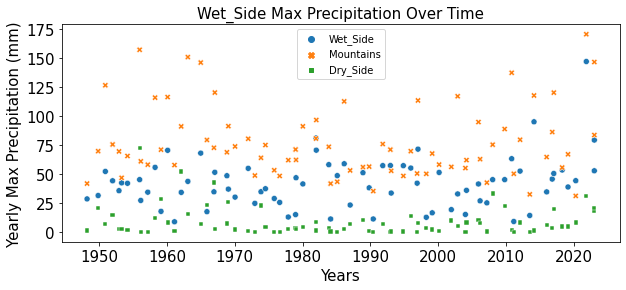

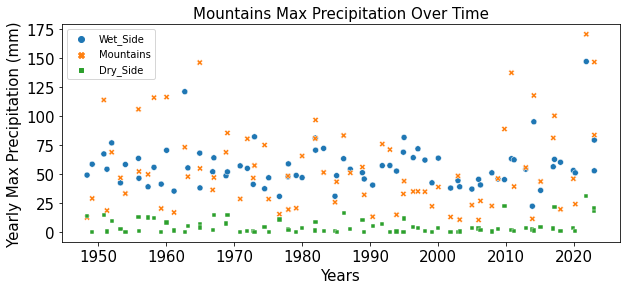

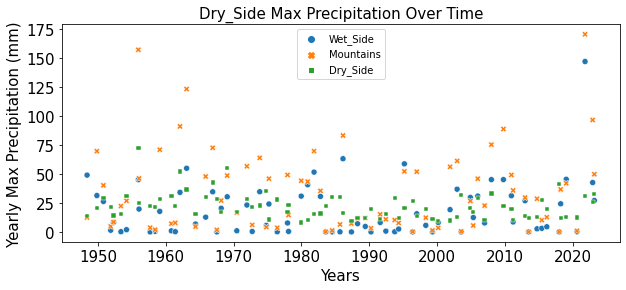

In [32]:
# Generate scatter plots for each dataframe to visualize the precipitation difference on a particular day.

# Making list of dataframe to iterate through
yearly_max = [max_mt_precip_per_year, max_ws_precip_per_year, max_ds_precip_per_year]

for x,y in zip(yearly_max, coords):
    
    fig,ax= plt.subplots(figsize=(10,4))

    sns.scatterplot(data = x)

    plt.title(f"{y} Max Precipitation Over Time", fontsize=15)
    plt.ylabel("Yearly Max Precipitation (mm)", fontsize=15)
    plt.xlabel("Years", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    plt.show()



### Plotting the maximum precipitation values for each year reveals the differences in precipitation between the two regions. However,......

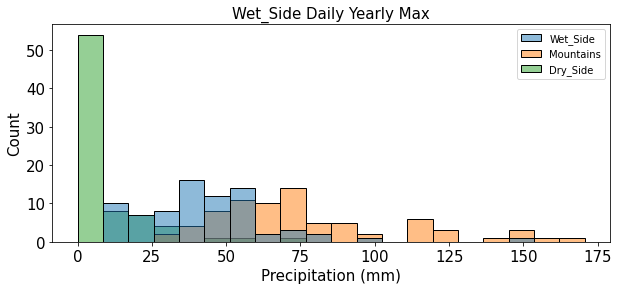

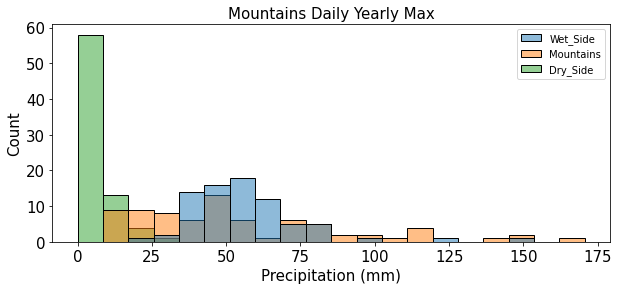

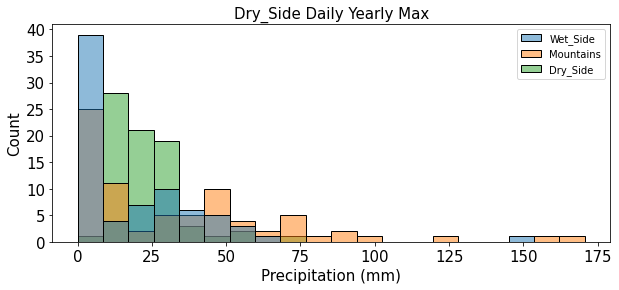

In [34]:
# Plotting histograms of both datsets


for x,y in zip(yearly_max, coords):
    fig,ax= plt.subplots(figsize=(10,4))

    sns.histplot(data=x, bins=20)
    
    plt.title(f'{y} Daily Yearly Max', fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.xlabel("Precipitation (mm)", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.show()

### The histograms above illustrate that the days per year when the mountainous region received the most precipitation were not necessarily the best for the dry or wet sides of the region. Specifically, on the dry side, most of the precipitation values were 20 mm or less, while on the wet side, they were around 50 mm or less. The dry side histogram is particularly striking due to the noticeable absence of precipitation during the peak values for this side.

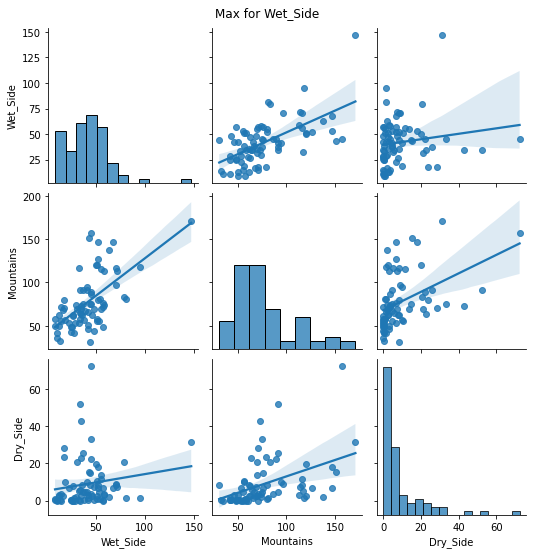

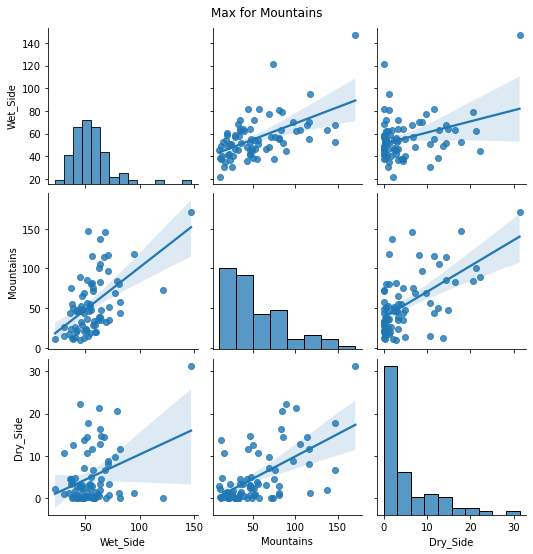

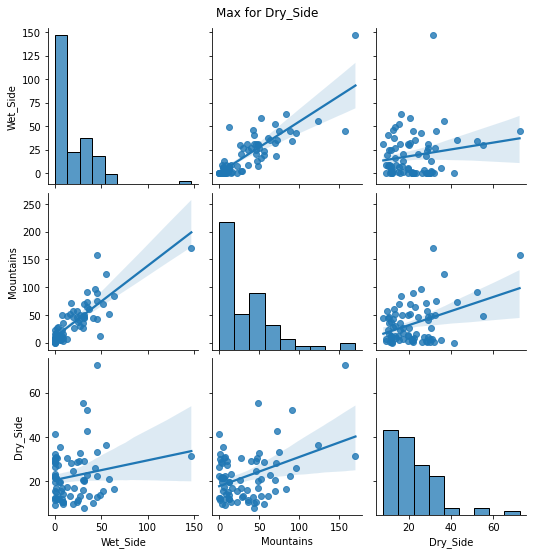

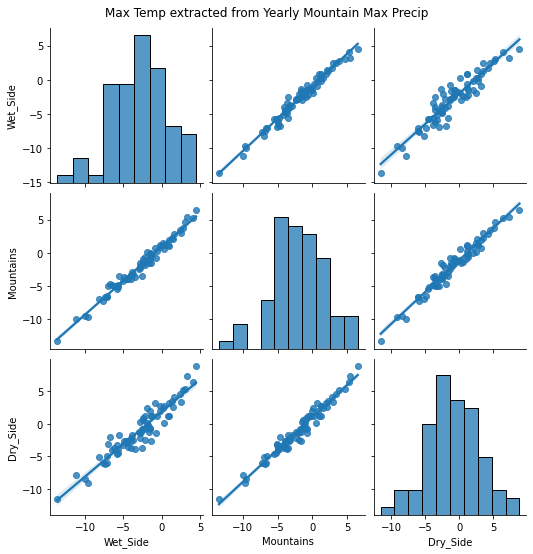

In [15]:
# We can visualize the relationships between the variables by creating a pairplot.

for x,y in zip(yearly_max, coords):
    
    sns.pairplot(data=x, kind="reg")
    plt.suptitle(f'Max for {y}', y=1.02)
    
    plt.show()
    
sns.pairplot(data=filtered_temp_df, kind="reg")
plt.suptitle('Max Temp extracted from Yearly Mountain Max Precip', y=1.02)
plt.show()

### The correlation analysis of the three variables suggests a positive trend, but the confidence intervals for each variable indicate wide variations in the correlation. While the clustering around the regression line is relatively tight for the mountain and wet side variables, the dry side variable does not show a similar pattern. Thus, there appears to be a weak correlation between the precipitation amounts at each location. However, when examining the maximum temperature values extracted from the days per year that received the most precipitation in the mountain region, a strong positive correlation with a tight confidence interval is observed, unlike the precipitation variables. This highlights the significant impact of topography on precipitation, which is minimal for temperature.

# Part 2:

## Extreme Value Analysis

In [16]:
# Preprocessing daily data values for use with pyextremes


# converting xarray into pandas
prec_df_1 = data_1['prcp'].to_pandas()
prec_df_2 = data_2['prcp'].to_pandas()
prec_df_3 = data_3['prcp'].to_pandas()

# convert the index to a datetime object
prec_df_1.index = pd.to_datetime(prec_df_1.index)
prec_df_2.index = pd.to_datetime(prec_df_2.index)
prec_df_3.index = pd.to_datetime(prec_df_3.index)

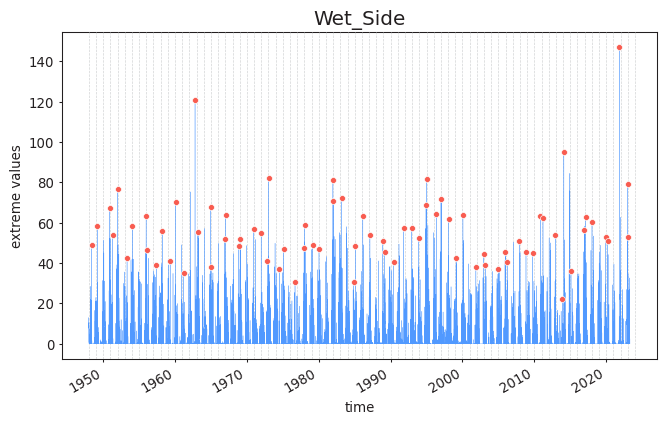

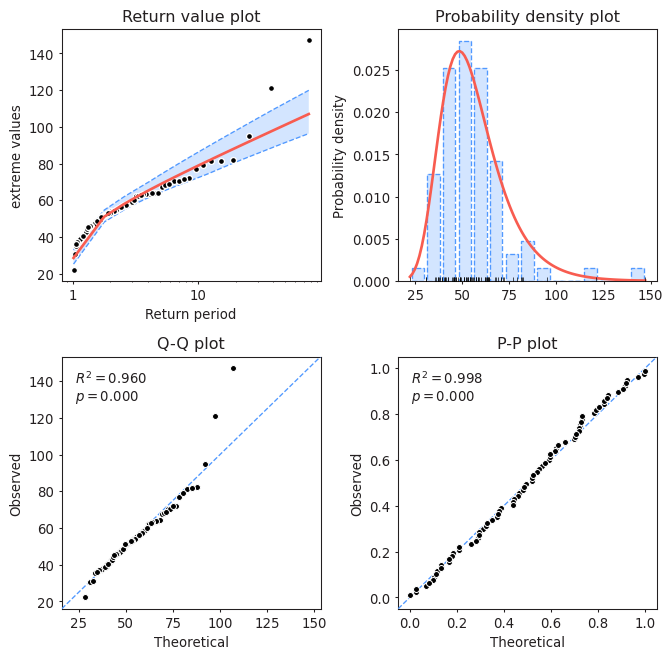


 
                            Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          None      Size:                              27,503
Start:                       January 1948      End:                           April 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 76      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:           

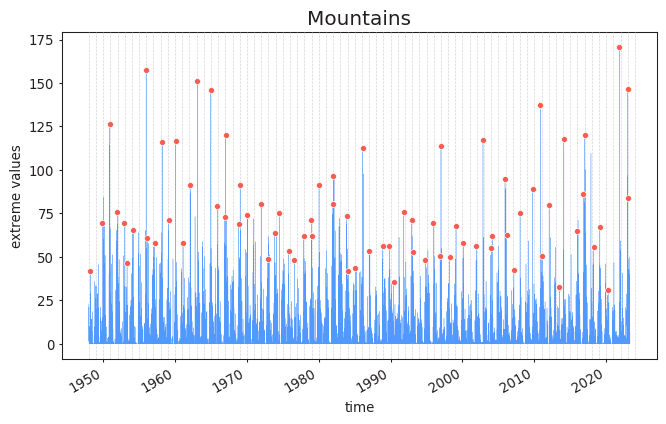

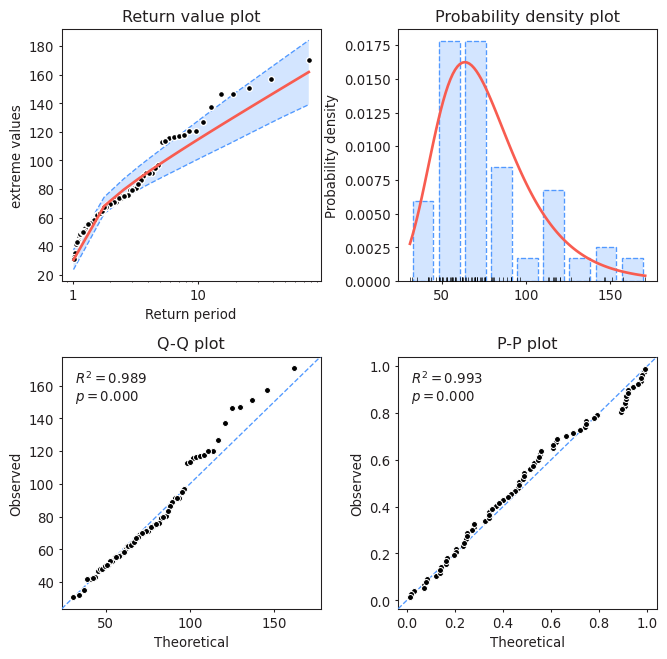


 
                            Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          None      Size:                              27,503
Start:                       January 1948      End:                           April 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 76      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:           

/Users/garrickhague/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:2492: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


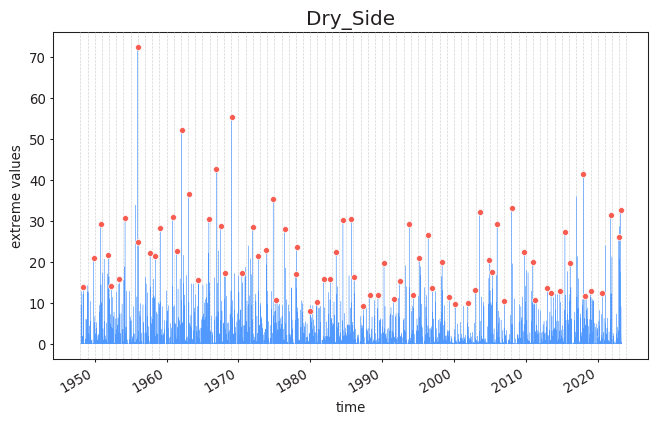

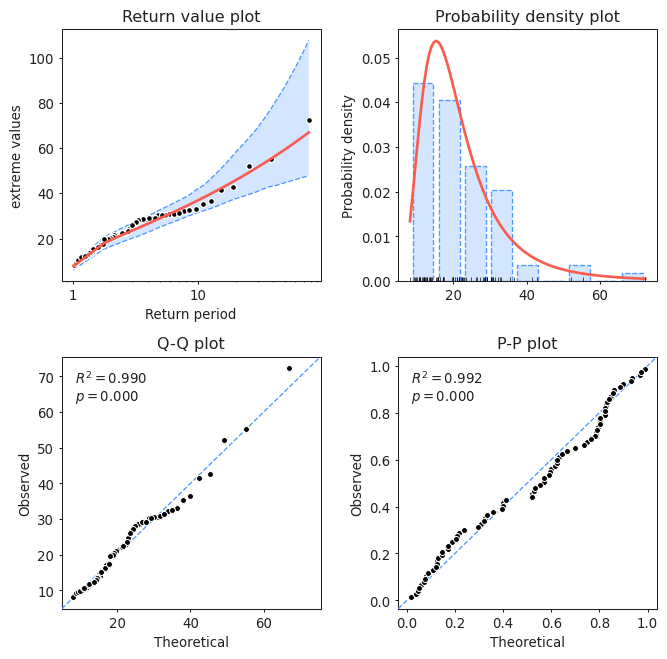


 
                            Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          None      Size:                              27,503
Start:                       January 1948      End:                           April 2023
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 76      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:           

In [17]:
# pyextremes is a Python library aimed at performing univariate Extreme Value Analysis (EVA)


names = [prec_df_1, prec_df_2, prec_df_3]

# Start timer
start_time = time.time()

for x,y in zip(names,coords):
    
    # Creating the model using data
    model = pyextremes.EVA(x)
    
    # Extract extreme values using block maxima over 365 days
    model.get_extremes(method="BM", block_size="365.2425D")

    # Plotting extremes over the existing data
    model.plot_extremes()
    plt.title(y, fontsize=15)
    
    # By default, the fit_model method selects the best model applicable to extracted extremes 
    # using the Akaike Information Criteria (AIC).
    model.fit_model()
    model.plot_diagnostic(alpha=0.95)
    plt.show()
    
    print('\n', '\n', model)
        
# Stop timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print elapsed time
print('\n', f"Elapsed time: {elapsed_time:.4f} seconds")

### The best-fitting model for each region was determined using the Akaike Information criterion. A gambel distribution with two free parameters was used for the wet side and mountains, while a general extreme distribution with three free parameters was used for the dry side. The shape parameter for the gambel distribution was zero, indicating a good fit. The Q-Q and P-P plots for all regions showed a good fit to the distribution, resulting in tight confidence intervals. However, the confidence intervals for the dry side looked more exponential and had a worse fit than the other regions, which had a more linear look.

In [18]:
# Printing return periods from model and using a timer to time it. 


# Start timer
start_time = time.time()


for x,y in zip(names,coords): 
    model = pyextremes.EVA(x)
    model.get_extremes(method="BM", block_size="365.2425D")
    
    # Fitting a GEV distribution to the extremes
    model.fit_model()

    # Sample the distribution at specfic comulative probabilities to get return values
    summary = model.get_summary(
        return_period=[10, 50, 100, 500],
        alpha=0.95,
        n_samples=1000)
    print('\n', y)
    print(summary)
    
print('\n')

for i in range(3):
    print(f'Max precip for', coords[i], precip_max_list[i])


# Stop timer
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print elapsed time
print('\n', f"Elapsed time: {elapsed_time:.4f} seconds")


 Wet_Side
               return value    lower ci    upper ci
return period                                      
10.0              78.773370   71.088641   86.512948
50.0             101.088098   88.626182  113.496272
100.0            110.521768   96.162546  124.992771
500.0            132.321539  112.964856  150.962791

 Mountains
               return value    lower ci    upper ci
return period                                      
10.0             114.642331  100.533495  128.285642
50.0             152.058959  130.429092  172.881515
100.0            167.877038  143.072383  191.209730
500.0            204.430202  172.273116  234.364452

 Dry_Side
               return value   lower ci    upper ci
return period                                     
10.0              36.883123  31.531682   43.498114
50.0              59.493122  42.242599   89.772823
100.0             71.764314  46.173721  127.031577
500.0            108.327965  54.833827  274.839150


Max precip for Wet_Side 147.13
Max

### The maximum precipitation values for each region correspond to different return periods. Specifically, the wet side has the highest maximum value with a return period of more than 1 in 500 years, while the mountains and the dry side have maximum values with a return period of 1 in 100 years.

# Conclusion 

### Based on the analysis performed, it can be concluded that the Lake Tahoe region experiences varying levels of precipitation and extreme events across different locations. The topography of the region plays a significant role in the distribution of precipitation, with the mountainous region receiving the highest amounts of precipitation, followed by the wet side and the dry side.

### The correlation analysis revealed a weak correlation between the precipitation amounts at each location. However, there was a strong positive correlation between the maximum temperature extracted from the days per year that received the most precipitation for the mountain region.

### Extreme Value Theory was used to estimate the likelihood of extreme precipitation events per region, and the results showed that the wet side has the highest likelihood of experiencing extreme events. The Akaike Information Criterion was used to determine the best-fitting model, with the gambel distribution proving to be the best for the wet side and mountainous region, while the general extreme distribution was the best for the dry side.

### Overall, this analysis highlights the importance of understanding the unique topographical features of a region and its impact on precipitation patterns. The findings could be useful for local authorities and emergency management teams in the development of strategies to mitigate the impact of extreme precipitation events in the Lake Tahoe region.

# Future work: 

### Based on the analysis above, there are several avenues for future work that could build on the current findings.

### Exploring the correlation between the precipitation and other weather variables, such as temperature, humidity, and wind patterns, could provide further insights into the factors that drive precipitation in the Lake Tahoe region. This could be done through regression analysis or other statistical modeling techniques.

### The analysis of extreme value theory could be extended to examine other extreme weather events, such as heat waves or droughts, and to explore the potential impacts of climate change on the frequency and intensity of such events in the region.
